## Module_2: *(Template)*

## Team Members:
Mahsood Ali and Michael Dornic

## Project Title:
Fibrotic Lesions Analysis at Different Fibrotic Lung Depths




## Project Goal:
This project seeks to analyze random scans of fibrotic lungs of mice in order to see if different lengths can predict the severity of fibrosis. Desmin, Smooth muscle alpha actin, and CD-31 will be studied. 

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence:  
IPF prevalence estimates in the USA varied between 14 and 27.9 cases per 100,000 population using narrow case definitions, and 42.7 and 63 per 100,000 population using broad case definitions. The annual incidence of IPF in the USA was estimated at 6.8–8.8 per 100,000 population using narrow case definitions and 16.3–17.4 per 100,000 population using broad case definitions.
https://pmc.ncbi.nlm.nih.gov/articles/PMC9487229/


* Risk factors (genetic, lifestyle): 
You may have an increased risk for IPF because of your age, family history and genetics, lifestyle habits, or your sex.

Age: The risk of developing IPF increases as you get older. IPF is diagnosed most often in people who are in their 60s or 70s.
Lifestyle habits: Smoking is a common risk factor among people who have IPF.
Sex: IPF is more common among men than women.
Family history and genetics: Your risk for IPF is higher if a first-degree relative, such as a parent or sibling, has IPF. 
https://www.nhlbi.nih.gov/health/idiopathic-pulmonary-fibrosis/causes

* Symptoms:
-Shortness of breath
-Dry cough
-Extreme tiredness
-Weight loss that's not intended
-Aching muscles and joints
-Widening and rounding of the tips of the fingers or toes, called clubbing
https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690

* Standard of care treatment(s): 
There are treatments avaliable for those who are effected by IPF such as Antifrobitic drugs, Pulmonary rehabillation, Oxygen therapy, Management of Comorbidities, and Lung transplation. There is currently no known cure for IPF. 
https://www.aafp.org/family-physician/patient-care/care-resources/respiratory-health/idiopathic-pulmonary-fibrosis.html#treatment


* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): 
IPF is a chronic, progressive lung disease caused by abnormal healing after repeated microscopic injuries to the alveoli. Instead of normal repair, fibroblasts overproduce scar tissue, leading to stiff, thickened lungs that cannot transfer oxygen effectively.


## Data-Set: 
The dataset we were given consists of 78 black and white images provided by Dr. Shayn Peirce-Cottler and Dr. Sarah Groves at different depths based on fibrotic lung that was obtained through mice lungs. The mice were injected with bleomycin which is a fungus that causes lung fibrosis. The white marks on the images indicated signals of fibrotic lesions, or scars, on the fibrotic lungs of the mice.

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 37508
Black pixels in image 1: 4156796

White pixels in image 2: 73224
Black pixels in image 2: 4121080

White pixels in image 3: 48667
Black pixels in image 3: 4145637

White pixels in image 4: 101283
Black pixels in image 4: 4093021

White pixels in image 5: 21648
Black pixels in image 5: 4172656

Percent white px:
MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

MASK_Sk658 Llobe ch010023.jpg:
0.8942604064941406% White | Depth: 100 microns

MASK_Sk658 Llobe ch010026.jpg:
1.7457962036132812% White | Depth: 2800 microns

MASK_Sk658 Llobe ch010032.jpg:
1.1603116989135742% White | Depth: 500 microns

MASK_Sk658 Llobe ch010034.jpg:
2.4147748947143555% White | Depth: 4500 microns

MASK_Sk658 Llobe ch010039.jpg:
0.5161285400390625% White | Depth: 15 microns

CSV file 'Percent_White_Pixels.csv' has been created.
The interpolated point i

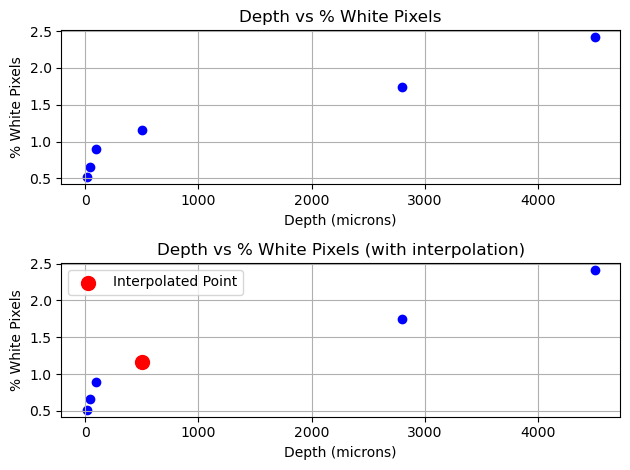

LINEAR REGRESSION RESULTS (measured only)
Slope: 0.000374
Intercept: 0.735
R-squared: 0.9496
P-value: 0.00097


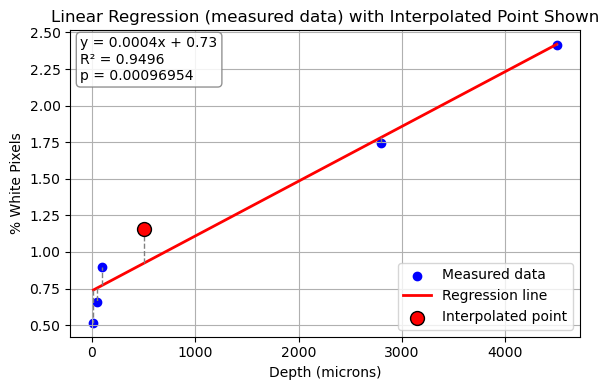

In [1]:
## Data Analysis
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import stats   # for linear regression
import pandas as pd

# Load the images you want to analyze
filenames = [
    r"MASK_Sk658 Llobe ch010017.jpg",
    r"MASK_Sk658 Llobe ch010023.jpg",
    r"MASK_Sk658 Llobe ch010026.jpg",
    r"MASK_Sk658 Llobe ch010032.jpg",
    r"MASK_Sk658 Llobe ch010034.jpg",
    r"MASK_Sk658 Llobe ch010039.jpg",
]

# Enter the depth of each image (in the same order that the images are listed above)
depths = [45, 100, 2800, 500, 4500, 15]

# Make the lists that will be used
images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing
for filename in filenames:
    img = cv2.imread(filename, 0)
    if img is None:
        raise FileNotFoundError(f"Could not read image: {filename}")
    images.append(img)

# For each image, calculate black and white pixels
for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)
    white = np.sum(binary == 255)
    black = np.sum(binary == 0)
    white_counts.append(white)
    black_counts.append(black)

# Print number of pixels per color
print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate percent white pixels
for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print filename, percent white, and depth
print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:', "red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

# Save data to CSV
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})
df.to_csv('Percent_White_Pixels.csv', index=False)
print("CSV file 'Percent_White_Pixels.csv' has been created.")

# -----------------------------
# Interpolation (linear)
# -----------------------------
interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))
x = depths
y = white_percents
i = interp1d(x, y, kind='linear')
interpolate_point = float(i(interpolate_depth))
print(colored(f'The interpolated point is at x={interpolate_depth}, y={interpolate_point:.3f}.', "green"))

depths_i = depths[:] + [interpolate_depth]
white_percents_i = white_percents[:] + [interpolate_point]

# Plot interpolation results
fig, axs = plt.subplots(2, 1)
axs[0].scatter(depths, white_percents, color='blue')
axs[0].set_title('Depth vs % White Pixels')
axs[0].set_xlabel('Depth (microns)')
axs[0].set_ylabel('% White Pixels')
axs[0].grid(True)

axs[1].scatter(depths_i, white_percents_i, color='blue')
axs[1].scatter(depths_i[-1], white_percents_i[-1], color='red', s=100, label='Interpolated Point')
axs[1].set_title('Depth vs % White Pixels (with interpolation)')
axs[1].set_xlabel('Depth (microns)')
axs[1].set_ylabel('% White Pixels')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# Linear Regression (measured points only, interpolated point shown)
# ---------------------------------------------------------------
x_meas = np.array(depths, dtype=float)
y_meas = np.array(white_percents, dtype=float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_meas, y_meas)

print(colored("LINEAR REGRESSION RESULTS (measured only)", "yellow"))
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.5f}")

# Regression line + residuals
x_line = np.linspace(min(x_meas), max(x_meas), 200)
y_line = intercept + slope * x_line
y_hat_meas = intercept + slope * x_meas

plt.figure(figsize=(6,4))
plt.scatter(x_meas, y_meas, color="blue", label="Measured data")
plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")

# Interpolated point (shown, not used in fit)
plt.scatter([interpolate_depth], [interpolate_point],
            color="red", edgecolor="k", s=100, zorder=5, label="Interpolated point")

# Residual "drop lines"
for xi, yi, yhi in zip(x_meas, y_meas, y_hat_meas):
    plt.plot([xi, xi], [yhi, yi], color='gray', linestyle='--', linewidth=1)

plt.xlabel("Depth (microns)")
plt.ylabel("% White Pixels")
plt.title("Linear Regression (measured data) with Interpolated Point Shown")
plt.legend()
plt.grid(True)

# --- Stats box on the figure ---
eqn = f"y = {slope:.4f}x + {intercept:.2f}"
stats_box = f"{eqn}\nR\u00b2 = {r_value**2:.4f}\np = {p_value:.5g}"
ax = plt.gca()
ax.text(
    0.02, 0.98, stats_box,
    transform=ax.transAxes, va="top", ha="left",
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.85),
    fontsize=10
)

plt.tight_layout()
plt.show()


## Verify and validate your analysis: 
Based on our graphs, both the original and the linearly interpolated graphs show a positive correlation between depth and percentage of white pixels in the scans, with a max of 2.5% at around 4,000-4,500 microns, suggesting increased fibrosis at deeper levels of the lungs. Based on our graphs, both the original and linearly interpolated plots show a positive correlation between image depth and the percentage of white pixels, with a maximum of approximately 2.5% white pixels at ~4,000 microns. The linear regression confirms this trend, showing a strong positive relationship between depth and fibrosis-related white-pixel percentage (R² = 0.94, p < 0.01*). This indicates that the model explains roughly 94 % of the variation in pixel whiteness with depth. NOTE: The interpolated point shown is not included in the regression calculation, to avoid biasing the statistical fit. 

## Conclusions and Ethical Implications: 
Our data suggests that it may be possible to predict the percentage of fibrosis at various biopsy depths by graphing and analyzing data using interpolation methods such as linear, quadratic, and cubic models. Using the bleomycin model of IPF, our results indicate a consistent trend that fibrotic lesions increase as the depth within the lung increases. This insight highlights the importance of designing biopsy devices capable of reaching deeper lung regions to capture the most affected tissue areas, while still minimizing potential injury to the patient. When applying these findings, it is important to make diagnostic accuracy a priority alongside patient safety. Developing devices or procedures that target deeper lung regions must consider the increased risk of tissue damage, infection, or respiratory complications. Ethical research and medical design should prioritize minimizing harm while maximizing diagnostic value.

## Limitations and Future Work: 
Although our graphs indicated increased fibrotic lesions at deeper lung scans, it is important to consider that these tests were conducted on mice, not humans, so it is not a direct comparison. The structure of mice lungs are different to serve the different composition of mice (like for example the fact that they move on four legs). The mice were also treated with the fungus bleomycin, which may be similar but not identical to how IPF forms in humans.  Thus, future work may use similar scans on humans with IPF to see if the data follows similar trends to this dataset. 

## NOTES FROM YOUR TEAM: 
In this module, we focused on examining how the depths of lungs show difference in the effects of idiopathic pulmonary fibrosis (IPF). We began by researching background information on IPF to understand its common effects, the biological mechanisms involved, and the populations most impacted. After establishing this foundation, we explored our dataset and selected six sample lung images for detailed analysis. Using these images, we use computational techniques to allow us to visualize and analyze depth-related changes within lung tissue, providing a structured framework for investigating patterns associated with IPF progression. 